In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 7)

Populating the interactive namespace from numpy and matplotlib


In [46]:
data = pd.read_csv("../dataAnalysis/searchLog.csv")
data.drop_duplicates(inplace = True)
data.rename(columns = lambda x: x.strip(), inplace = True)
data.rename(columns = lambda x: x.lower(), inplace = True)
data.head()

,algorithm,heuristic,problem,branches explored,arcs revised,number of vars,number of constraints
0,Backtracking,None,10Queens,975,0,10,45
1,Forward Checking,Smallest Domain,10Queens,292,517,10,45
2,Forward Checking,Name,10Queens,150,215,10,45
3,Forward Checking,Random,10Queens,84,120,10,45
4,Forward Checking,MaxDegree,10Queens,150,215,10,45


In [47]:
data['branch per constraint'] = data['branches explored']/data['number of constraints']
data['branch per variable'] = data['branches explored']/data['number of vars']
data.head()

,algorithm,heuristic,problem,branches explored,arcs revised,number of vars,number of constraints,branch per constraint,branch per variable
0,Backtracking,None,10Queens,975,0,10,45,21.666667,97.5
1,Forward Checking,Smallest Domain,10Queens,292,517,10,45,6.488889,29.2
2,Forward Checking,Name,10Queens,150,215,10,45,3.333333,15.0
3,Forward Checking,Random,10Queens,84,120,10,45,1.866667,8.4
4,Forward Checking,MaxDegree,10Queens,150,215,10,45,3.333333,15.0


In [48]:
datah = data.copy()
datah['algorithm'] = data['algorithm'] + "+" + data['heuristic']
datah.drop('heuristic',axis=1,inplace=True)
datah.head()

,algorithm,problem,branches explored,arcs revised,number of vars,number of constraints,branch per constraint,branch per variable
0,Backtracking+None,10Queens,975,0,10,45,21.666667,97.5
1,Forward Checking+ Smallest Domain,10Queens,292,517,10,45,6.488889,29.2
2,Forward Checking+ Name,10Queens,150,215,10,45,3.333333,15.0
3,Forward Checking+ Random,10Queens,84,120,10,45,1.866667,8.4
4,Forward Checking+ MaxDegree,10Queens,150,215,10,45,3.333333,15.0


/cs/home/dav/Documents/workdir/CS4144/python/lib64/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


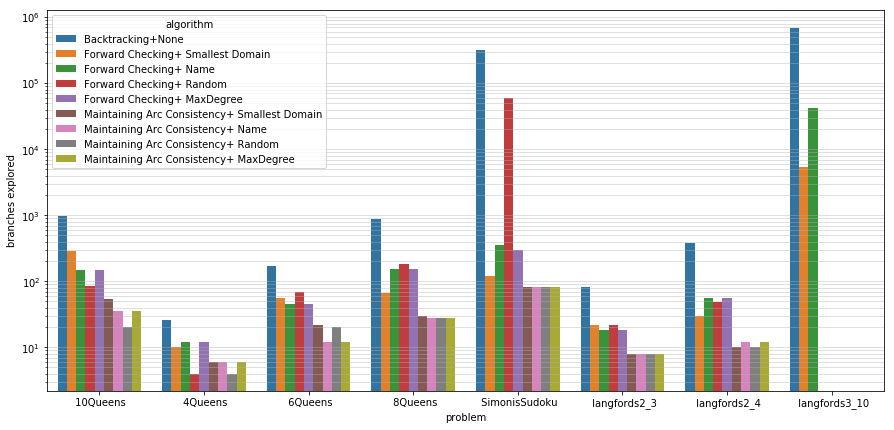

In [61]:
plt.grid(True,which="both",ls="-",alpha = 0.5)
g = sns.barplot(x='problem',y='branches explored',data=datah,hue='algorithm')
g.set_yscale('log')